# Topic Modelling
This notebook runs all 3 models (LDA, NMF, LSA) for topic modelling and visualizes the results to select the best topic model. We chose to look at the top 10 words per topic and the distribution of topics to decide on the best topic model. Finally, we train and save the best topic model, then demonstrate the topic prediction on a sample review.

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# importing modules
import src.transformations as c
from src.topic_modelling.train.train_lda import train_lda
from src.topic_modelling.train.train_nmf import train_nmf
from src.topic_modelling.train.train_lsa import *
import models.train_topicmodelling as fm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kelli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kelli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kelli\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kelli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# loading data
current_path = os.getcwd()
root_path = os.path.dirname(current_path)
df = pd.read_csv(root_path + '/data/reviews.csv', encoding='unicode_escape')

## Data Processing and Model Training

In [4]:
# clean data
df['stem_clean_text'] = df['Text'].apply(lambda x: c.get_cleantext(x, stemming=True))

df['clean_text'] = df['Text'].apply(lambda x: c.get_cleantext(x))
df['clean_text'] = df['clean_text'].apply(lambda x: c.lemmatize_text(x))
df['clean_text'] = df['clean_text'].apply(lambda x: c.words_remove(x))

In [5]:
#feature engineering
df_bow = c.new_bow(df['clean_text'].tolist())
df_tfidf = c.new_tfidf(df['clean_text'].tolist())

In [6]:
# run LDA, NMF
num_topics = 20
n_top_words = 10
lda_topic_words, lda_pred, lda_model = train_lda(df, num_topics=num_topics, n_top_words=n_top_words)
nmf_topic_words, nmf_pred, nmf_model = train_nmf(df, num_topics=num_topics, n_top_words=n_top_words)

In [7]:
# add topic predictions to df
df['lda_pred'] = lda_pred
df['nmf_pred'] = nmf_pred

## Evaluation

### View top words of each topic

In this section, we look at the top 10 words in each topic. For good topic models, we expect to see that:
1. the top words are related to each other (e.g. orange+apple) 
2. there are less words that do not belong to the topic (e.g. in orange+metal+apple, metal does not belong in the topic)

In [8]:
#LSA model
for i in range(15,20):
    print("\nnumber of topics:"+str(i))
    print("Bag of Words")
    t1, p1 = lsa(df_bow, i)
    print("\nTF-IDF")
    t2, p2=lsa(df_tfidf, i)


number of topics:15
Bag of Words

 Topic 0:  taste flavor good product make great well coffee food would 
 Topic 1:  food product dog cat eat stool baby make formula ingredient 
 Topic 2:  tea bag drink green black leaf iced white loose lipton 
 Topic 3:  stool water baby constipation sugar formula infant colon taste milk 
 Topic 4:  coffee cup tea stool baby formula constipation infant roast bean 
 Topic 5:  flavor juice orange chip soda drink fruit tangerine calorie sugar 
 Topic 6:  food cat taste eat good love coffee day feed grain 
 Topic 7:  product taste dog food drink flavor juice orange soda cat 
 Topic 8:  make mix cup free drink gluten sugar would ingredient bisquick 
 Topic 9:  good chip bag product would taste well bake kettle know 
 Topic 10:  bag chip taste bake dog lay salt kettle treat ingredient 
 Topic 11:  make flavor good dog taste treat stool chicken china salt 
 Topic 12:  cat free food product flavor gluten mix oil taste ingredient 
 Topic 13:  eat bar free pro

LSA with 18 topics using BoW seems to give the best topics based on the output above.

In [9]:
lsa_topics, lsa_pred = lsa(df_bow, 18)


 Topic 0:  taste flavor good product make great well coffee food would 
 Topic 1:  food product dog cat eat stool baby make formula ingredient 
 Topic 2:  tea bag drink green black leaf iced white loose lipton 
 Topic 3:  stool water baby constipation sugar formula infant colon taste milk 
 Topic 4:  coffee cup tea stool baby formula constipation infant roast bean 
 Topic 5:  flavor juice orange chip soda drink fruit calorie tangerine sugar 
 Topic 6:  food cat eat taste good love coffee day feed grain 
 Topic 7:  product taste dog food drink flavor juice orange cat soda 
 Topic 8:  make mix cup free drink gluten sugar would ingredient bisquick 
 Topic 9:  good chip bag product would taste well bake know kettle 
 Topic 10:  bag chip taste bake dog lay kettle salt treat ingredient 
 Topic 11:  flavor make taste good stool dog mix chicken salt baby 
 Topic 12:  cat food free product gluten mix best flavor organic great 
 Topic 13:  price well make store water best food bag drink would 


In [10]:
df['lsa_pred'] = lsa_pred

In [11]:
print("Top ", n_top_words, " words in ", num_topics, " topics for LDA model:")
for (topic_idx, words) in lda_topic_words:
    print("Topic ", topic_idx, ": ", words)

Top  10  words in  20  topics for LDA model:
Topic  0 :  0.289*"coffe" + 0.186*"cup" + 0.041*"flavor" + 0.031*"ground" + 0.028*"like" + 0.027*"morn" + 0.026*"tast" + 0.024*"tri" + 0.023*"avoid" + 0.022*"mention"
Topic  1 :  0.123*"tea" + 0.059*"away" + 0.050*"bean" + 0.048*"return" + 0.044*"wast" + 0.043*"powder" + 0.036*"cake" + 0.035*"half" + 0.035*"green" + 0.022*"abl"
Topic  2 :  0.164*"chocol" + 0.123*"cooki" + 0.067*"jar" + 0.046*"wonder" + 0.044*"avail" + 0.044*"consum" + 0.043*"sick" + 0.042*"number" + 0.039*"earth" + 0.026*"die"
Topic  3 :  0.318*"thought" + 0.148*"help" + 0.114*"kid" + 0.084*"rate" + 0.002*"granddaught" + 0.000*"hot" + 0.000*"hip" + 0.000*"paid" + 0.000*"descript" + 0.000*"money"
Topic  4 :  0.182*"enjoy" + 0.081*"unfortun" + 0.075*"cereal" + 0.068*"bottom" + 0.054*"blend" + 0.050*"realli" + 0.041*"certainli" + 0.041*"addict" + 0.035*"mini" + 0.020*"worri"
Topic  5 :  0.089*"oil" + 0.058*"smell" + 0.045*"pop" + 0.040*"absolut" + 0.039*"cream" + 0.037*"continu

For the LDA model, the top 10 words for each topic do not suggest very distinct topics. For most of the topics, the top words are not closely related to each other. We can interpret the topics as:
- Topic 0 - Coffee
- Topic 1 - Tea
- Topic 2 - Chocolate
- Topic 3 - Kids
- Topic 4 - Cereal
- Topic 5 - Aroma
- Topic 6 - Healthy Snack
- Topic 7 - Packaging
- Topic 8 - Pet Food
- Topic 9 - Taste
- Topic 10 - Dog Food
- Topic 11 - Chips
- Topic 12 - Unknown
- Topic 13 - Nutrition
- Topic 14 - Unknown
- Topic 15 - Juice
- Topic 16 - Sweet Drinks
- Topic 17 - Breakfast
- Topic 18 - Baking
- Topic 19 - Amazon

In [12]:
print("Top ", n_top_words, " words in ", num_topics, " topics for NMF model:")
for [topic_idx, words] in nmf_topic_words:
    print("Topic ", topic_idx, ": ", words)

Top  10  words in  20  topics for NMF model:
Topic  0 :  ['like', 'tast', 'tast like', 'dont', 'realli', 'better', 'realli like', 'much', 'didnt', 'like tast']
Topic  1 :  ['coffe', 'cup', 'brew', 'roast', 'cup coffe', 'bean', 'strong', 'coffe tast', 'tast coffe', 'blend']
Topic  2 :  ['tea', 'green tea', 'green', 'ice tea', 'ice', 'brew', 'drink', 'tea tast', 'black tea', 'tea bag']
Topic  3 :  ['price', 'amazon', 'great price', 'ship', 'buy', 'good price', 'get', 'save', 'subscrib', 'price amazon']
Topic  4 :  ['great', 'tast great', 'tast', 'great tast', 'love', 'great price', 'great product', 'make great', 'work', 'kid']
Topic  5 :  ['bar', 'snack', 'tasti', 'healthi', 'eat', 'calori', 'protein', 'sweet', 'nut', 'peanut']
Topic  6 :  ['dog', 'treat', 'love', 'china', 'dog love', 'made', 'made china', 'dog food', 'chicken', 'food']
Topic  7 :  ['free', 'gluten', 'gluten free', 'cooki', 'pasta', 'mix', 'sugar', 'sugar free', 'free diet', 'rice']
Topic  8 :  ['drink', 'juic', 'orang',

For the NMF model, the top 10 words for each topic suggest relatively distinct topics as compared to the LDA and LSA models. The words are more quite closely related to each other. We can interpret the topics as:
- Topic 0 - Taste
- Topic 1 - Coffee
- Topic 2 - Tea
- Topic 3 - Amazon
- Topic 4 - Taste/ Price
- Topic 5 - Healthy Snacks
- Topic 6 - Dog Food
- Topic 7 - Healthy Carbohydrates
- Topic 8 - Cold Beverages
- Topic 9 - Hot Beverages
- Topic 10 - Flavour
- Topic 11 - Chips
- Topic 12 - Delivery Feedback
- Topic 13 - Taste
- Topic 14 - Saltiness
- Topic 15 - Recommendation
- Topic 16 - Trying
- Topic 17 - Alternative Sources e.g. supermarkets/ Amazon
- Topic 18 - Cat/ Baby Food
- Topic 19 - Cooking Ingredients

Looking at the top 10 words of each topic, the NMF model seems to be able to identify distinct topics best.

### Distribution of topics

In this section, we want to see the distribution of topics predicted. In good topic models, there should not be only one or two topics that are dominant. 

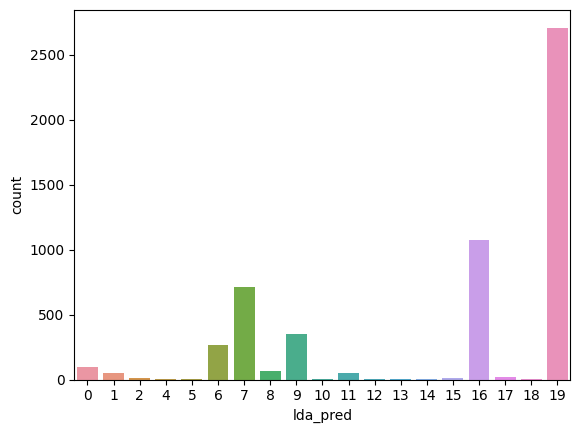

In [13]:
sns.countplot(x=df['lda_pred']);

From the plot above, we can observe that the LDA model identifies an unusually high proportion of reviews as Topic 19. This suggests that the model is unable to differentiate between topics well.

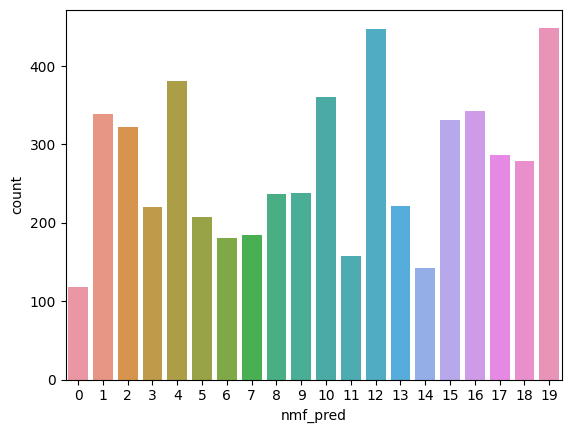

In [14]:
sns.countplot(x=df['nmf_pred']);

The plot above shows a reasonable distribution of topics identified by the NMF model.

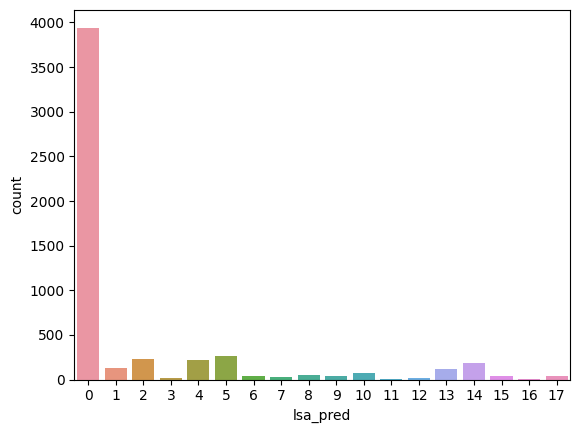

In [15]:
sns.countplot(x=df['lsa_pred']);

This plot shows LSA model fails to discover topics within all reviews, and most of the reviews are classified into one group.

## Conclusion

From our analysis above, we conclude that the NMF model is best able to identify distinct topics from the reviews dataset.

In [16]:
# function to display wordcloud
def display_wordclouds(df, pred_col, num_topics):
    fig = plt.figure(figsize=(20,10))
    j = int(np.ceil(num_topics/4))
    for t in range(num_topics):
        # Join the different processed titles together.
        long_string = ','.join(list(df[df[pred_col]==t]['stem_clean_text'].values))
        # Create a WordCloud object
        wordcloud = WordCloud(width=700, height=250, 
                              background_color="white", 
                              max_words=500)
        if len(long_string)==0:
            long_string = 'None'
        # Generate a word cloud
        wordcloud.generate(long_string)
        i=t+1
        plt.subplot(j, 4, i).set_title("Topic #" + str(t))
        plt.plot()
        plt.imshow(wordcloud)
        plt.axis("off")
    plt.suptitle(pred_col[:3].upper() + " Topics", fontsize=30)
    plt.tight_layout()
    plt.show()

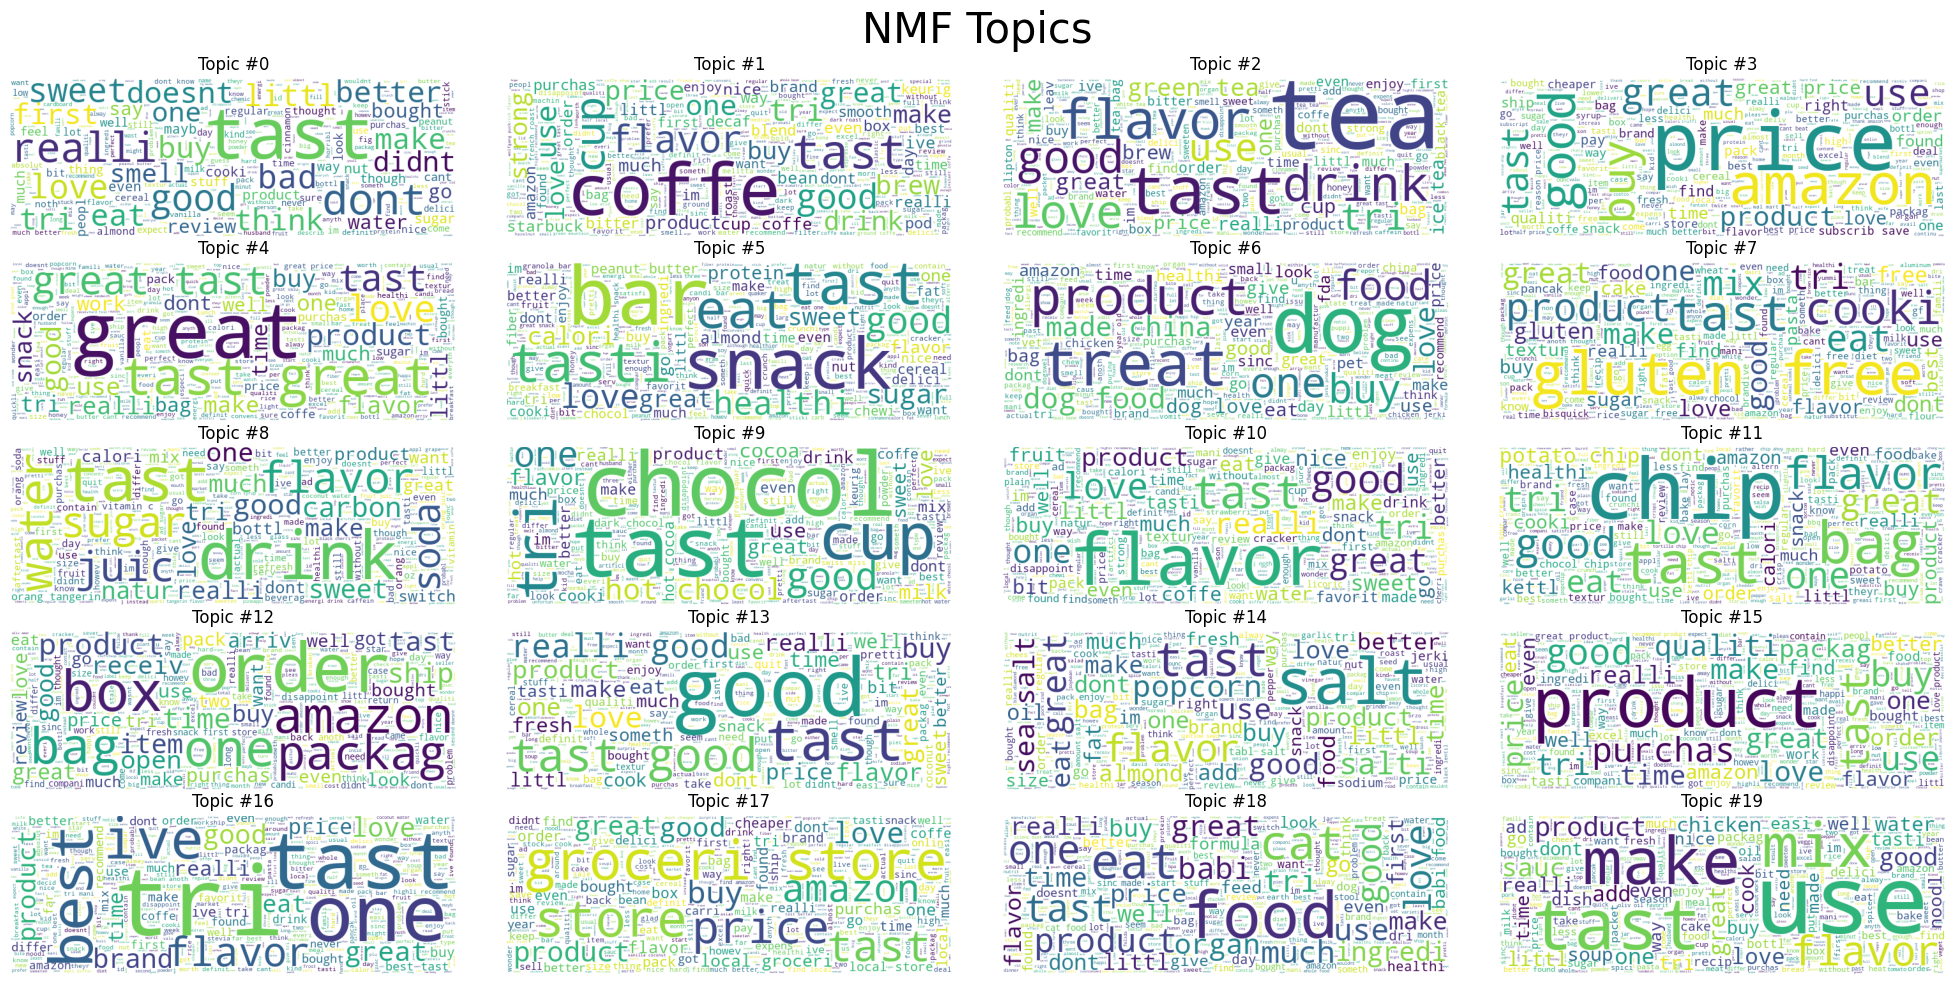

In [17]:
display_wordclouds(df, 'nmf_pred', num_topics=num_topics)

The word clouds above show the words in each topic. We can see that most of the topics are distinct.

## Final Model

In this section, we train and save a final NMF model then use it to predict the topic of an example.

In [18]:
# training and saving the model
fm.train_save_topic_model(df, num_topics=20)

In [19]:
# predicting the topic of this review
test_review = df.sample(random_state=1)['Text'].values[0]
res = fm.predict_topic(test_review)
print("Review:", test_review, end="\n")
print("The review above is about " + res + ".")

Review: This bar is good. It tastes like eating a banana mixed in with some nuts. I like that it doesn't have any sugar added and it just uses the natural sugars from the banana to flavor the bar.
The review above is about Healthy Snacks.
